
## BACCHANAL BUFFET (yelp.com) COMMENT ANALYSIS PROJECT


<img src='https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1a/cf/e1/38/bacchanal-buffet.jpg?w=700&h=-1&s=1'>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from textblob import TextBlob,Word
from nltk.stem.snowball import SnowballStemmer

In [ ]:
df=pd.read_csv('restaurant.csv')

In [ ]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
df = df.drop(['Unnamed: 0', 'useful', 'funny','cool','user_id','business_id'], axis=1)

In [ ]:
df['text'].value_counts()

On our last day in Vegas, we decided to have our final lunch here and oh boy we made the BEST DECISION ever.\n\nThe food and its quality is simply outstanding! From the hot plated breakfast to the mouth watering gelato desserts. The pork buns and dimsums were a family favorite. The roast beef etc were hot! Everything was phenomenal. \n\nStaff were very attentive too. Nice and courteous. \n\nThese are the reasons this is the BEST BUFFET IN VEGAS. \n\nWhen we come back in Vegas, expect us to be back!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
df.shape

(10417, 4)

In [ ]:
import seaborn as sns

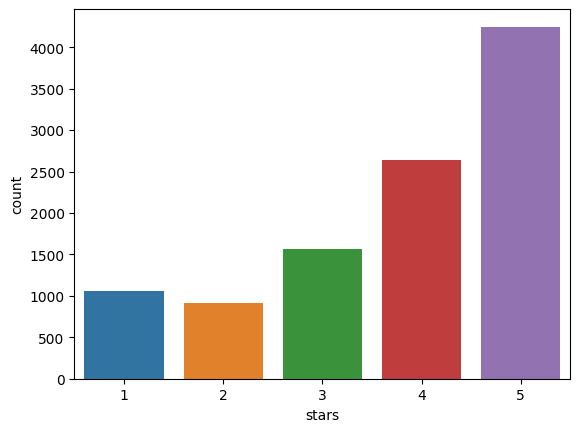

In [ ]:
sns.countplot(x=df['stars']);

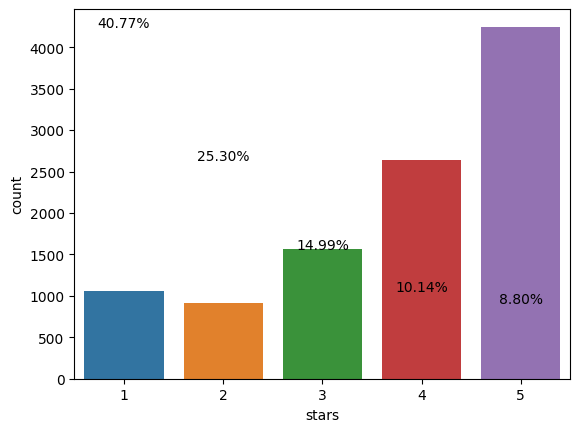

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yıldızların yüzdelik dağılımını hesaplayın
star_percentages = df['stars'].value_counts(normalize=True) * 100

# Countplot'u çizin ve yüzdelik değerleri y ekseni etiketlerine ekleyin
ax = sns.countplot(x=df['stars'])
for i, percentage in enumerate(star_percentages):
    ax.text(i, df['stars'].value_counts().values[i], f"{percentage:.2f}%", ha='center')

# Grafiği gösterin
plt.show()

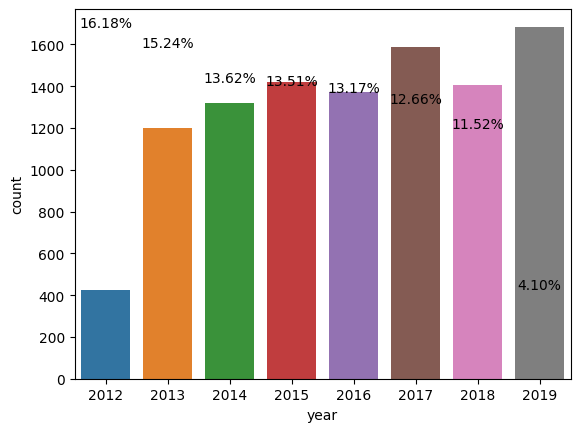

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yılları elde etmek için 'date' sütununu kullanın
df['year'] = pd.to_datetime(df['date']).dt.year

# Yılların yüzdelik dağılımını hesaplayın
year_percentages = df['year'].value_counts(normalize=True) * 100

# Countplot'u çizin
ax = sns.countplot(x=df['year'])

# Yüzdelik değerleri grafiğin üzerine ekleyin
for i, percentage in enumerate(year_percentages):
    ax.text(i, df['year'].value_counts().values[i], f"{percentage:.2f}%", ha='center')

# Grafiği gösterin
plt.show()

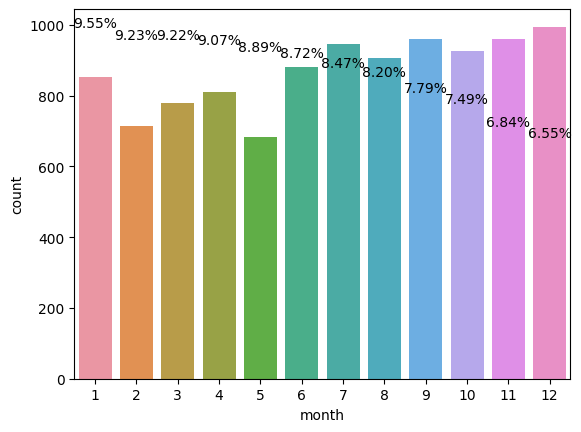

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ayları elde etmek için 'date' sütununu kullanın
df['month'] = pd.to_datetime(df['date']).dt.month

# Ayların yüzdelik dağılımını hesaplayın
month_percentages = df['month'].value_counts(normalize=True) * 100

# Countplot'u çizin ve yüzdelik değerleri y ekseni etiketlerine ekleyin
ax = sns.countplot(x=df['month'])
for i, percentage in enumerate(month_percentages):
    ax.text(i, df['month'].value_counts().values[i], f"{percentage:.2f}%", ha='center')

# Grafiği gösterin
plt.show()

In [ ]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','')
df['text']=df['text'].str.replace('\r','')

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
pip install requests --upgrade

In [ ]:
#textleri ingilizceye ceviriyor

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect
from googletrans import Translator

translator = Translator(service_urls=['translate.google.com'])

def translate_to_english(text):
    if detect(text) != 'en':
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    else:
        return text

df['text'] = df['text'].apply(translate_to_english)

In [ ]:
df.tail(10)

,review_id,stars,text,date,year,month
10407,1M8cypfOEn9FwpdXN3qaVw,4,first time coming to this made reservations on...,2019-04-18 14:39:28,2019,4
10408,_xEeTl3o9nbl949_NKFsdQ,5,the bacchanal buffet is in my opinion the best...,2017-12-09 05:32:48,2017,12
10409,--Rcc25wmvC2YikMKO1duQ,5,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53,2019,4
10410,LbMPx0u9mAcaVDOYiiArsQ,1,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49,2019,12
10411,ErLDRaBYPyt8x6DkJuY9TA,5,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56,2019,12
10412,46xWDTFPZI9u6waHm78EKw,5,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,2019,11
10413,gbBau-2wy3_kNr2y6dEa1Q,4,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,2019,11
10414,2wFmrsm8j1cyyG-DoMqKUw,5,the selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12
10415,75nzyA96_BgVrpflweAA3w,4,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,2019,11
10416,mMa_YQNBJfuh_Nw_x81jlw,4,i got a chance to go to the bacchanal buffett ...,2019-11-30 22:36:56,2019,11


In [ ]:
iyivekotu=df[(df['stars']==5) | (df['stars']==1)]

In [ ]:
iyivekotu.reset_index(drop=True,inplace=True)

In [ ]:
iyivekotu.head(10)

,review_id,stars,text,date,year,month
0,_WTGv5XnA-qb_XD1D7Z0jg,5,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,12
1,rbkxvrgZg5kdCL2a66QYmA,1,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,12
2,5tw_pedoHVi9bgeiBNsISg,5,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,7
3,gmZJrnsIpYIrhPBsaAVjIw,5,really enjoyed everything they had to offer it...,2015-04-01 16:18:34,2015,4
4,9n4EEhhLlaLDX3QQFVoHMw,5,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19,2017,3
5,H7mAukrkPgfIDyL8_yn0bw,5,best buffet as of march beats wicked spoon an...,2014-04-01 01:23:42,2014,4
6,Ls_yxqGw1Uo_YXY6J2kfHw,5,we tried bacchanal for lunch on a wednesday in...,2013-02-21 21:56:09,2013,2
7,7aYfSp52nU6UbZbeRZ2c-g,1,food is fine better than most buffets when i r...,2015-07-16 07:53:22,2015,7
8,nb6KNON8Rulne5Dkm7tIMQ,5,amazing buffet went at ish on a thursday and b...,2013-04-10 16:59:04,2013,4
9,q80yQsWL-6HI784psNezcw,5,if this is what heaven is like then im going t...,2014-02-05 18:58:17,2014,2


<Axes: xlabel='stars', ylabel='count'>

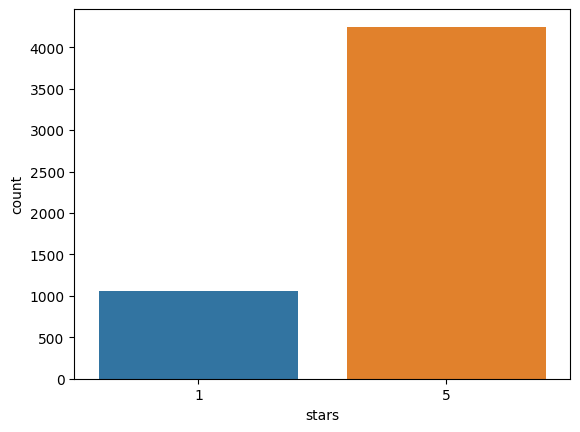

In [ ]:
sns.countplot(x=iyivekotu['stars'])

In [ ]:
x=iyivekotu['text']
y=iyivekotu['stars']

In [ ]:
x[0]#1.yorum

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [ ]:
#modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [ ]:
x=vect.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [ ]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [ ]:
nb=MultinomialNB()

In [ ]:
model=nb.fit(x_train,y_train)

In [ ]:
pred=nb.predict(x_test)

In [ ]:
accuracy_score(pred,y_test)

0.9

In [ ]:
tf.head()

,__,__ great,____,____ add,____ came,___this,___this def,_books,_books trip,aa,...,zorro,zorro slot,zucchini,zucchini flower,àlacarte,àlacarte restaurants,中国游客别去chinese,中国游客别去chinese tourists,服务很好价格也实惠,服务很好价格也实惠 excellent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob

# Sentiment analizini gerçekleştirip sonuçları 'sentiment' sütununa yazma işlemi
df['sentiment'] = df['text'].apply(lambda x: 'positive' if TextBlob(str(x)).sentiment.polarity > 0 else 'negative' if TextBlob(str(x)).sentiment.polarity < 0 else 'neutral')

# Sonuçları kontrol etme
print(df[['text', 'sentiment']].head(10))

                                                text sentiment
0  after getting food poisoning at the palms hote...  positive
1  a feast worthy of godsbaccarnal buffet in caes...  positive
2  the crab legs are better than the ones at wick...  negative
3  not worth it too salty food and expensive this...  negative
4  i would give this infinite stars if i could my...  positive
5  really enjoyed everything they had to offer it...  positive
6  came for dinner at  per person at around pm pr...  positive
7  probably one the best buffet ive been to in ve...  positive
8  lots of choices good service line wasnt as lon...  positive
9  i have been craving getting down with a buffet...  positive


In [ ]:
from textblob import TextBlob

# Sentiment analizini gerçekleştirip sonuçları ayrı sütunlara yazma işlemi
df['polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Sonuçları kontrol etme
print(df[['text', 'polarity', 'subjectivity']].head(10))

                                                text  polarity  subjectivity
0  after getting food poisoning at the palms hote...  0.337330      0.586926
1  a feast worthy of godsbaccarnal buffet in caes...  0.219409      0.537292
2  the crab legs are better than the ones at wick... -0.134722      0.731944
3  not worth it too salty food and expensive this... -0.325000      0.400000
4  i would give this infinite stars if i could my...  0.362500      0.725000
5  really enjoyed everything they had to offer it...  0.187500      0.335145
6  came for dinner at  per person at around pm pr...  0.155215      0.432766
7  probably one the best buffet ive been to in ve...  0.257870      0.422685
8  lots of choices good service line wasnt as lon...  0.225000      0.441667
9  i have been craving getting down with a buffet...  0.172704      0.529479


In [ ]:
df.head()

,review_id,stars,text,date,year,month,sentiment,polarity,subjectivity
0,_WTGv5XnA-qb_XD1D7Z0jg,5,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,12,positive,0.337330,0.586926
1,JlNnsvMPLK_1-X2hwzK24w,4,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014,1,positive,0.219409,0.537292
2,hBkoWffORRb6aqKhC_Li2A,4,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,6,negative,-0.134722,0.731944
3,rbkxvrgZg5kdCL2a66QYmA,1,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,12,negative,-0.325000,0.400000
4,5tw_pedoHVi9bgeiBNsISg,5,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,7,positive,0.362500,0.725000


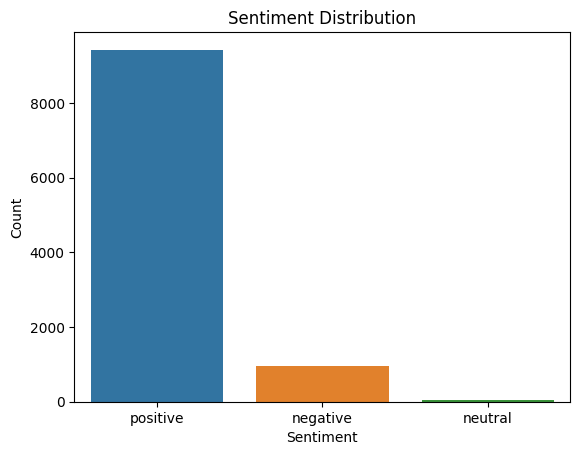

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot oluşturma
sns.countplot(data=df, x='sentiment')

# Eksen etiketlerini ve başlığı ekleme
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Grafikleri görüntüleme
plt.show()

In [ ]:
!pip install stylecloud

In [ ]:
import stylecloud

# Pozitif metinleri filtreleme
positive_texts = df[df['sentiment'] == 'positive']['text']

# Pozitif metinleri birleştirme
combined_text = ' '.join(positive_texts)

# Stil bulutunu oluşturma
stylecloud.gen_stylecloud(text=combined_text, icon_name='fas fa-thumbs-up', output_name='positive.png')

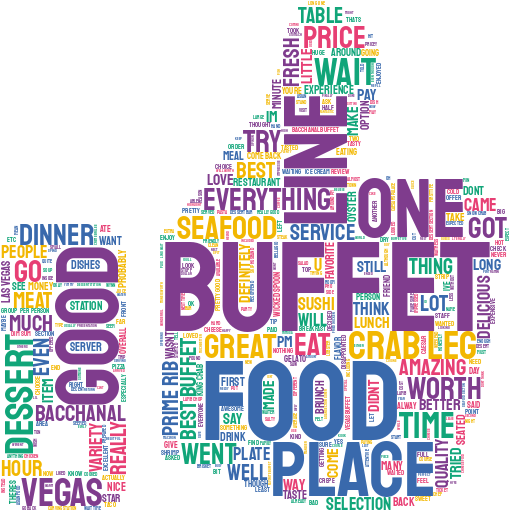

In [ ]:
from IPython.display import Image
Image('positive.png')

In [ ]:
import stylecloud

# Negatif metinleri filtreleme
negative_texts = df[df['sentiment'] == 'negative']['text']

# Negatif metinleri birleştirme
combined_text = ' '.join(negative_texts)

# Stil bulutunu oluşturma
stylecloud.gen_stylecloud(text=combined_text, icon_name='fas fa-thumbs-down', output_name='negative.png')

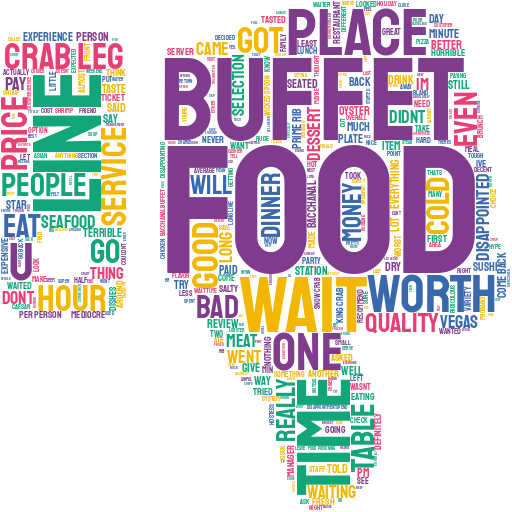

In [ ]:
from IPython.display import Image
Image('negative.png')

In [ ]:
from collections import Counter
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
import pandas as pd

# Stopwords'leri indirme
nltk.download('stopwords')

# Stopwords'leri belirleme
stop_words = set(stopwords.words('english'))

# Pozitif metinleri filtreleme
positive_texts = df[df['sentiment'] == 'positive']['text']

# Negatif metinleri filtreleme
negative_texts = df[df['sentiment'] == 'negative']['text']

# Pozitif metinlerdeki 2 kelime gruplarını bulma
positive_bigrams = [gram for text in positive_texts for gram in list(ngrams(nltk.word_tokenize(text), 2))]
positive_filtered_bigrams = [gram for gram in positive_bigrams if all(word.lower() not in stop_words for word in gram)]
positive_bigram_counts = Counter(positive_filtered_bigrams)

# Pozitif metinlerdeki 3 kelime gruplarını bulma
positive_trigrams = [gram for text in positive_texts for gram in list(ngrams(nltk.word_tokenize(text), 3))]
positive_filtered_trigrams = [gram for gram in positive_trigrams if all(word.lower() not in stop_words for word in gram)]
positive_trigram_counts = Counter(positive_filtered_trigrams)

# Negatif metinlerdeki 2 kelime gruplarını bulma
negative_bigrams = [gram for text in negative_texts for gram in list(ngrams(nltk.word_tokenize(text), 2))]
negative_filtered_bigrams = [gram for gram in negative_bigrams if all(word.lower() not in stop_words for word in gram)]
negative_bigram_counts = Counter(negative_filtered_bigrams)

# Negatif metinlerdeki 3 kelime gruplarını bulma
negative_trigrams = [gram for text in negative_texts for gram in list(ngrams(nltk.word_tokenize(text), 3))]
negative_filtered_trigrams = [gram for gram in negative_trigrams if all(word.lower() not in stop_words for word in gram)]
negative_trigram_counts = Counter(negative_filtered_trigrams)

# En yaygın 2 kelime gruplarını tablo olarak gösterme
positive_bigram_table = pd.DataFrame.from_records(positive_bigram_counts.most_common(10), columns=['Bigram', 'Count'])
negative_bigram_table = pd.DataFrame.from_records(negative_bigram_counts.most_common(10), columns=['Bigram', 'Count'])

print("Positive Bigrams:")
print(positive_bigram_table)

print("\nNegative Bigrams:")
print(negative_bigram_table)

# En yaygın 3 kelime gruplarını tablo olarak gösterme
positive_trigram_table = pd.DataFrame.from_records(positive_trigram_counts.most_common(10), columns=['Trigram', 'Count'])
negative_trigram_table = pd.DataFrame.from_records(negative_trigram_counts.most_common(10), columns=['Trigram', 'Count'])

print("\nPositive Trigrams:")
print(positive_trigram_table)

print("\nNegative Trigrams:")
print(negative_trigram_table)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive Bigrams:
                Bigram  Count
0         (crab, legs)   3235
1       (best, buffet)   1578
2         (prime, rib)   1488
3         (las, vegas)    886
4         (come, back)    824
5      (wicked, spoon)    799
6  (bacchanal, buffet)    740
7           (dim, sum)    725
8         (king, crab)    703
9        (per, person)    664

Negative Bigrams:
                Bigram  Count
0         (crab, legs)    234
1         (come, back)     96
2         (prime, rib)     96
3        (per, person)     92
4         (king, crab)     79
5      (wicked, spoon)     63
6  (bacchanal, buffet)     52
7         (snow, crab)     47
8           (go, back)     47
9         (wait, time)     45

Positive Trigrams:
                              Trigram  Count
0                  (king, crab, legs)    415
1                  (snow, crab, legs)    208
2                 (best, buffet, ive)    202
3                 (buffet, ive, ever)    160
4               (steamed, crab, legs)    146
5            

In [ ]:
positive_bigram_table.head(10)

,Bigram,Count
0,"(crab, legs)",3235
1,"(best, buffet)",1578
2,"(prime, rib)",1488
3,"(las, vegas)",886
4,"(come, back)",824
5,"(wicked, spoon)",799
6,"(bacchanal, buffet)",740
7,"(dim, sum)",725
8,"(king, crab)",703
9,"(per, person)",664


In [ ]:
negative_bigram_table.head(10)

,Bigram,Count
0,"(crab, legs)",234
1,"(come, back)",96
2,"(prime, rib)",96
3,"(per, person)",92
4,"(king, crab)",79
5,"(wicked, spoon)",63
6,"(bacchanal, buffet)",52
7,"(snow, crab)",47
8,"(go, back)",47
9,"(wait, time)",45


In [ ]:
positive_trigram_table.head(10)

,Trigram,Count
0,"(king, crab, legs)",415
1,"(snow, crab, legs)",208
2,"(best, buffet, ive)",202
3,"(buffet, ive, ever)",160
4,"(steamed, crab, legs)",146
5,"(mochi, ice, cream)",125
6,"(worth, every, penny)",124
7,"(hot, crab, legs)",119
8,"(chocolate, covered, strawberries)",105
9,"(mac, n, cheese)",91


In [ ]:
negative_trigram_table.head(10)

,Trigram,Count
0,"(king, crab, legs)",33
1,"(snow, crab, legs)",22
2,"(never, come, back)",14
3,"(never, go, back)",11
4,"(got, food, poisoning)",11
5,"(alaskan, king, crab)",10
6,"(go, somewhere, else)",9
7,"(steamed, crab, legs)",9
8,"(stone, crab, claws)",8
9,"(paid, per, person)",7


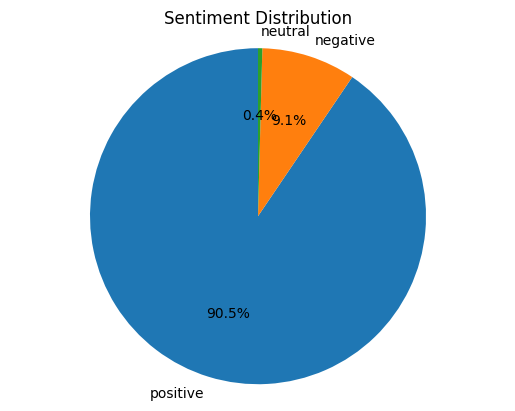

In [ ]:

# Sınıf sayılarını hesaplama
class_counts = df['sentiment'].value_counts()

# Yüzdelik hesaplama
percentages = (class_counts / len(df)) * 100

#tabloyu oluşturma
fig, ax = plt.subplots()
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Sentiment Distribution')

plt.show()